# Imports

In [35]:
# common / KNN imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.spatial.distance
from collections import Counter
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

# Aufgaben

## A KNN

#### How many distances you need to calculate if you have 60,000 samples in the trainingset for 50 samples?
Man muss 3.000.000 Abstände berechnen.
#### How many distances do you need to calculate if you have n samples im the trainingset?
Man muss immer n * 50 Abstände berechnen, d.h. bei 3 Samples müsste man 150 Abstände berechnen, bei 90.000 dann 4.500.000

## B KNN

### What is the error rate of KNN on the test set?

In [3]:
def knn(k):
    dists = scipy.spatial.distance.cdist(x_train_sample, x_test_sample, metric='euclid')
    idx_nearest = np.argpartition(dists, k, axis=0)[:k]
    idx_nearest = np.swapaxes(idx_nearest, 0, 1)
    #print(idx_nearest)

    closest_points_labels = y_train_sample[idx_nearest]
    predictions = []
    
    for index, predicted_labels in enumerate(closest_points_labels):
        predictions.append(np.bincount(predicted_labels).argmax())
    return predictions

In [4]:
def print_error_rate(predictions):
    
    correct = 0
    
    correct_labels = (y_test_sample)
    
    numbers_count = Counter(correct_labels)
    
    numbers_correct = dict.fromkeys(numbers_count.keys(), 0)
    
    #numbers_error_rate = dict.fromkeys(numbers_count.keys(), None)
    
    
    n = correct_labels.shape[0]
    
    for index, prediction in enumerate(predictions):
        if prediction == correct_labels[index]:
            correct += 1
            numbers_correct[prediction] += 1
        
    error_rate = 1- (correct / n)
    
    
    for key in sorted(numbers_count):
        count = numbers_count[key]
        correct = numbers_correct[key]
        error = 1 - numbers_correct[key] / numbers_count[key]
        print("Label:", key)
        print("  ", correct, "out of", count, "recognized correctly | Errorrate:", error*100, "%")
        
    print("\n"+"Resulting errorrate:", error_rate)

In [5]:
#Load dataset
mnist_data = tf.keras.datasets.mnist.load_data()

# Get Training set
train = mnist_data[0]
X_train, Y_train = train[0], train[1]

# Get Test set
test = mnist_data[1]
X_test, Y_test = test[0], test[1]

n_train = X_train.shape[0]
n_test = X_test.shape[0]

m = X_train.shape[1]**2

X_train = X_train.reshape([n_train, m])
X_test = X_test.reshape([n_test, m])

# Create train subset
idx = np.random.randint(n_train, size=10000)
x_train_sample = X_train[idx]
y_train_sample = Y_train[idx]

# Create test subset
idx = np.random.randint(n_test, size=30)
x_test_sample = X_test[idx]
y_test_sample = Y_test[idx]

In [6]:
predictions2 = knn(2)
predictions4 = knn(4)
predictions8 = knn(8)

print(list(y_test_sample), "\n")

print("-------------------------------------")
print("  2NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions2, "\n")
print_error_rate(predictions2)

print("-------------------------------------")
print("  4NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions4, "\n")
print_error_rate(predictions4)

print("-------------------------------------")
print("  8NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions8, "\n")
print_error_rate(predictions8)


[6, 5, 5, 5, 4, 5, 6, 9, 4, 3, 7, 5, 3, 6, 4, 2, 7, 9, 2, 9, 2, 5, 4, 6, 0, 4, 5, 8, 3, 5] 

-------------------------------------
  2NN  
-------------------------------------
Predictions:
[6, 5, 5, 5, 9, 5, 6, 9, 4, 3, 7, 5, 3, 6, 4, 2, 7, 9, 1, 9, 2, 5, 4, 6, 0, 4, 5, 8, 8, 5] 

Label: 0
   1 out of 1 recognized correctly | Errorrate: 0.0 %
Label: 2
   2 out of 3 recognized correctly | Errorrate: 33.333333333333336 %
Label: 3
   2 out of 3 recognized correctly | Errorrate: 33.333333333333336 %
Label: 4
   4 out of 5 recognized correctly | Errorrate: 19.999999999999996 %
Label: 5
   8 out of 8 recognized correctly | Errorrate: 0.0 %
Label: 6
   4 out of 4 recognized correctly | Errorrate: 0.0 %
Label: 7
   2 out of 2 recognized correctly | Errorrate: 0.0 %
Label: 8
   1 out of 1 recognized correctly | Errorrate: 0.0 %
Label: 9
   3 out of 3 recognized correctly | Errorrate: 0.0 %

Resulting errorrate: 0.09999999999999998
-------------------------------------
  4NN  
-----------------

##### What is the error rate of KNN on the test set?
Die Errorrate beim ersten Testen (mit k=2, train = 10.000, test = 30) war 6%.  
Beim testen mit neuen subsets gab es auch Errorraten zwischen 3 - 16%
##### What is the error rate for each label (number)?
Die Errorraten beim ersten Testen (mit k=2) waren:
* 0 - 0.0%
* 1 - 0.0%
* 2 - 0.0%
* 3 - 0.0%
* 4 - 33.0% (2/3)
* 5 - 20.0% (4/5)
* 6 - 0.0%
* 7 - 0.0%
* 8 - 0.0%
* 9 - 0.0%  
  
Beim testen mit anderen Subsets fällt auf, dass es bei den Zahlen 0-2 tendenziell niedrigere Fehlerquoten gibt als beim Rest.
##### How does the choice of k influence the result?
Beim ersten Testen hat sich die Errorrate mit zunehmendem k verbessert:

* k = 2: 6%
* k = 4: 3%
* k = 8: 3%  
  
Beim Testen mit anderen Subsets ist aufgefallen, dass k sich nicht immer auf die Errorquote auswirkt, aber k=4 tendenziell niedrigere Errorraten für unsere Test- und Traingrößen hatte.

## C K-means MNIST

In [41]:
# load subset
n_sample = 1000

idx = np.random.randint(n, size=n_sample)
x_sample = X_train[idx]
y_sample = Y_train[idx]

k = 10
q = 30
_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embedding = _tsne.fit_transform(x_sample)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.041s...
[t-SNE] Computed neighbors for 1000 samples in 3.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 624.693700
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.220764
[t-SNE] KL divergence after 300 iterations: 1.365417


In [42]:
def kmeans(q)
    # init centroids
    idx_centroid = np.random.randint(n_sample, size=k)
    centroids = x_sample[idx_centroid]
    
    # calc distances
    dists = scipy.spatial.distance.cdist(x_sample, centroids, metric='euclid')
    
    # find nearest centroids
    labels = np.argmin(dists, axis=1)
    
    
    # train model for q iterations
    for j in range(q):
        
        # calc distances
        dists = scipy.spatial.distance.cdist(x_sample, centroids, metric='euclid')
        
        # label according to nearest centroids
        labels = np.argmin(dists, axis=1)
        
        # get new centroids
        centroid_list = [x_sample[labels == i].mean(0) for i in range(k)]
        centroids = np.stack(centroid_list)


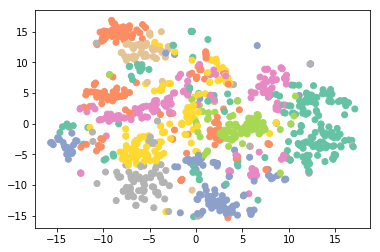

In [46]:
colors = [color_map[l-1] for l in labels]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)

In [53]:
for i in range(k):
    print('group', i, x_sample[labels == i].shape)
    print(np.bincount(y_sample[labels == i]).argmax())
    
    size = y_sample[labels == i].shape[0]
    bincount = np.bincount(y_sample[labels == i])
    mode = bincount.argmax()
    correct = bincount[mode]
    error_rate = 1- (correct / size)
    print(correct)
    print(size)
    print(error_rate)

group 0 (46, 784)
0
43
46
0.06521739130434778
group 1 (48, 784)
2
26
48
0.45833333333333337
group 2 (114, 784)
1
54
114
0.5263157894736843
group 3 (125, 784)
6
80
125
0.36
group 4 (149, 784)
7
47
149
0.6845637583892618
group 5 (101, 784)
1
67
101
0.3366336633663366
group 6 (138, 784)
3
59
138
0.572463768115942
group 7 (43, 784)
0
39
43
0.09302325581395354
group 8 (84, 784)
3
39
84
0.5357142857142857
group 9 (152, 784)
4
59
152
0.611842105263158


#### Do this for 10, 100, 1000 iterations
##### What is the majority class of each cluster?
##### What is the percentage of the majority class in each cluster?
##### Does each number have a cluster?
##### If not, which hasn’t?


## D MNIST understanding

## E KNN and K-means CIFAR

## F Linear regression BOSTON

## G Logistik regression MNIST

## H Feedback